## Quality Metrics

Visualize the spike sorting quality metrics that are generated from Kilosort (`metrics.csv`) and stored in the DataJoint pipeline (`element-array-ephys`).

If you are new to using this DataJoint pipeline for analyzing electrophysiology recordings from Neuropixels probes, please see the [tutorial](./tutorial.ipynb) notebook for an in-depth explanation to set up and run the workflow.

This notebook can run in a [GitHub Codespace](https://github.com/datajoint/workflow-array-ephys#interactive-tutorial), and requires the example data to be populated into the database using the [demo_prepare](./demo_prepare.ipynb) notebook.

In [2]:
import datajoint as dj
import matplotlib.pyplot as plt
import numpy as np
from workflow_array_ephys.pipeline import ephys, probe, ephys_report

[2023-04-12 22:56:31,441][WARNING]: lab.Project and related tables will be removed in a future version of Element Lab. Please use the project schema.
[2023-04-12 22:56:33,611][INFO]: Connecting ephysuser@db.datajoint.com:3306
[2023-04-12 22:56:34,636][INFO]: Connected ephysuser@db.datajoint.com:3306


### Populate the `QualityMetrics` table

In [ ]:
ephys.QualityMetrics.populate()

### Unit quality metrics

| Metric | Description |
| --- | --- |
| Firing rates (Hz) | Total number of spikes per time. |
| Signal-to-noise ratio | Ratio of the maximum amplitude of the mean spike waveform to the standard deviation of the background noise on a given channel. |
| Presence ratio | Proportion of time during a session that a unit is spiking, ranging from 0 to 0.99. |
| ISI (Interspike interval) violation | Rate of ISI violation as a fraction of overall rate. |
| Number violation | Total number of ISI violations. |
| Amplitude cut-off | False negative rate of a unit measured by the degree to which its distribution of spike amplitudes is truncated, indicating the fraction of missing spikes. An amplitude cutoff of 0.1 indicates approximately 10% missing spikes. |
| Isolation distance | A metric that uses the principal components (PCs) of a unit's waveforms, which are projected into a lower-dimensional PC space after spike sorting. This quantifies how well-isolated the unit is from other potential clusters. |
| L-ratio | A metric to quantify the distribution of spike distances from a cluster. A low L-ratio indicates that there is a relatively low number of non-member spikes around the target cluster. |
| D-prime | A metric calculated from waveform principal components using linear discriminant analysis. This measures the separability of one unit's PC cluster from all the others, with a higher d-prime value indicating better isolation of the unit. |
| Nearest-neighbors hit rate | The proportion of its nearest neighbors that belong to the same given cluster based on its first principal components. |
| Nearest-neighbors miss rate |  The proportion of its nearest neighbors that do not belong to the same given cluster based on its first principal components. |
| Silhouette score | The ratio between cohesiveness of a cluster (distance between member spikes) and its separation from other clusters (distance to non-member spikes). |
| Max drift | The maximum shift in spike location, calculated as the center of mass of the energy of the first principal component score. |
| Contamination rate | |

For further details of the quality metrics, please see:
- [Allen Institute Documentation](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html)

- [Buccino et al., eLife 2020](https://elifesciences.org/articles/61834)

We'll grab an example key for demonstration.

In [3]:
key = {"subject": "subject5", "insertion_number": 2}

query = ephys.QualityMetrics.Cluster & key
query

subject,session_id,insertion_number,paramset_idx,unit,firing_rate (Hz) firing rate for a unit,snr signal-to-noise ratio for a unit,presence_ratio fraction of time in which spikes are present,isi_violation rate of ISI violation as a fraction of overall rate,number_violation total number of ISI violations,amplitude_cutoff estimate of miss rate based on amplitude histogram,isolation_distance distance to nearest cluster in Mahalanobis space,l_ratio,d_prime Classification accuracy based on LDA,nn_hit_rate Fraction of neighbors for target cluster that are also in target cluster,nn_miss_rate Fraction of neighbors outside target cluster that are in target cluster,silhouette_score Standard metric for cluster overlap,max_drift Maximum change in spike depth throughout recording,cumulative_drift Cumulative change in spike depth throughout recording,contamination_rate
subject5,1,2,0,0,0.327068,5.1741,0.59,nan,None,0.5,36.7421,0.0209872,4.36162,0.294294,0.00054177,0.03586,3.89,5.27,nan
subject5,1,2,0,2,2.16572,4.28818,0.94,nan,None,0.5,57.1309,0.00329259,5.03851,0.979638,0.000313873,0.0973327,8.27,12.48,nan
subject5,1,2,0,3,6.60029,4.63847,0.99,nan,None,0.5,90.4176,0.000410589,6.4374,0.998,0.000469704,0.0733426,3.23,9.03,nan
subject5,1,2,0,4,0.533327,4.56249,0.74,nan,None,0.5,36.7083,0.0265655,2.5544,0.259259,0.00423141,-0.00208076,8.66,17.43,nan
subject5,1,2,0,5,2.29831,5.10661,0.84,nan,None,0.014956,57.8081,0.0143053,4.5877,0.970667,0.00291661,0.0903331,13.15,13.75,nan
subject5,1,2,0,6,9.04003,3.75238,0.99,nan,None,0.5,61.0942,0.0933396,3.19236,0.818,0.0337224,0.0545304,4.72,6.43,nan
subject5,1,2,0,7,0.0707173,3.80121,0.19,nan,None,0.5,690342000000000.0,nan,3.23436,0.1,0.000668003,-0.0111092,nan,0.0,nan
subject5,1,2,0,9,0.0766105,3.87867,0.2,nan,None,0.440071,1083500000000000.0,nan,4.97368,0.173333,0.000401003,nan,nan,0.0,nan
subject5,1,2,0,10,11.194,5.10249,0.99,nan,None,0.5,98.8003,0.0206255,3.76673,0.944667,0.0301297,0.0505288,4.49,7.73,nan
subject5,1,2,0,11,9.22861,4.54963,0.99,nan,None,0.399919,70.3693,0.0228612,4.03329,0.897333,0.0150244,0.0505288,5.41,12.02,nan


Plot histograms of the cluster metrics.

In [5]:
def plot_metric(ax, data, bins, x_axis_label=None, title=None, color='k', smoothing=True, density=False):
    """A function modified from https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html
    """
    from scipy.ndimage import gaussian_filter1d
    if any(data) and np.nansum(data):
        h, b = np.histogram(data, bins=bins, density=density)
        x = b[:-1]

        y = gaussian_filter1d(h, 1) if smoothing else h

        ax.plot(x, y, color=color)
        ax.set_xlabel(x_axis_label)
        ax.set_ylim([0, None])
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)

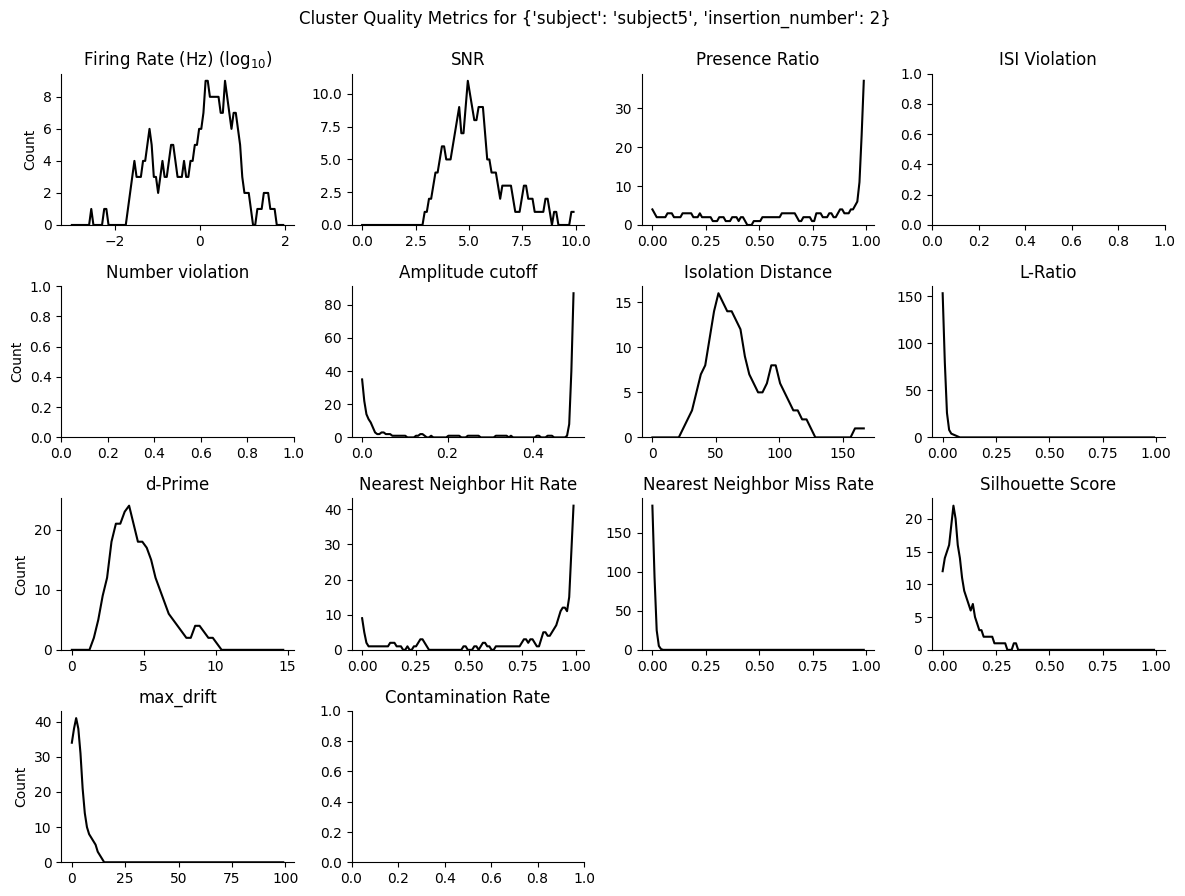

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(12, 9))
axes = axes.flatten()
plt.suptitle(f"Cluster Quality Metrics for {key}", y=.99, fontsize=12)

# Firing Rates
data = np.log10(query.fetch("firing_rate"))
bins = np.linspace(-3,2,100)
plot_metric(axes[0], data, bins, title="Firing Rate (Hz) (log$_{10}$)")
axes[0].set_ylabel("Count")

# Signal-to-Noise Ratio
data = query.fetch("snr")
bins = np.linspace(0, 10, 100)
plot_metric(axes[1], data, bins, title="Signal-to-Noise Ratio")

# Presence Ratio
data = query.fetch("presence_ratio")
bins = np.linspace(0, 1, 100)
plot_metric(axes[2], data, bins, title="Presence Ratio")

# ISI Violation
data = query.fetch("isi_violation")
bins = np.linspace(0, 1, 100)
plot_metric(axes[3], data, bins, title="ISI Violation")

# Number Violation
data = query.fetch("number_violation")
bins = np.linspace(0, 1, 100)
plot_metric(axes[4], data, bins, title="Number Violation")
axes[4].set_ylabel("Count")

# Amplitude Cutoff
data = query.fetch("amplitude_cutoff")
bins = np.linspace(0, 0.5, 100)
plot_metric(axes[5], data, bins, title="Amplitude Cutoff")

# Isolation Distance
data = query.fetch("isolation_distance")
bins = np.linspace(0, 170, 50)
plot_metric(axes[6], data, bins, title="Isolation Distance")

# L-Ratio
data = query.fetch("l_ratio")
bins = np.linspace(0, 1, 100)
plot_metric(axes[7], data, bins, title="L-Ratio")

# d-Prime
data = query.fetch("d_prime")
bins = np.linspace(0, 15, 50)
plot_metric(axes[8], data, bins, title="d-Prime")
axes[8].set_ylabel("Count")

# Nearest-Neighbors Hit Rate
data = query.fetch("nn_hit_rate")
bins = np.linspace(0, 1, 100)
plot_metric(axes[9], data, bins, title="Nearest-Neighbors Hit Rate")

# Nearest-Neighbors Miss Rate
data = query.fetch("nn_miss_rate")
bins = np.linspace(0, 1, 100)
plot_metric(axes[10], data, bins, title="Nearest-Neighbors Miss Rate")

# Silhouette Score
data = query.fetch("silhouette_score")
bins = np.linspace(0, 1, 100)
plot_metric(axes[11], data, bins, title="Silhouette Score")

# Max Drift
data = query.fetch("max_drift")
bins = np.linspace(0, 100, 100)
plot_metric(axes[12], data, bins, title="Max Drift")
axes[12].set_ylabel("Count")

# Contamination Rate
data = query.fetch("contamination_rate")
bins = np.linspace(0, 100, 100)
plot_metric(axes[13], data, bins, title="Contamination Rate")

axes[14].remove()
axes[15].remove()
plt.tight_layout()

### Waveform quality metrics

| Metric | Description |
| -- | -- |
| `Amplitude (μV)` | Absolute difference between the waveform peak and trough. |
| `Duration (ms)` | Time interval between the waveform peak and trough. |
| `Half Width (ms)` | Spike width at half of the maximum amplitude. |
| `Peak-to-Trough (PT)  Ratio` | Absolute amplitude of the peak divided by the absolute amplitude of the trough relative to 0. |
| `Repolarization Slope` | Slope of the fitted regression line to the first 30μs from trough to peak. |
| `Recovery Slope` | Slope of the fitted regression line to the first 30μs from peak to tail. |
| `Spread (μm)` | Spatial extent of channels where the waveform amplitude exceeds 12% of the peak amplitude. |
| `Velocity Above (s/m)` | Inverse velocity of waveform propagation from the soma toward the top of the probe. |
| `Velocity Below (s/m)` | Inverse velocity of waveform propagation from the soma toward the bottom of the probe. |

In [9]:
query = ephys.QualityMetrics.Waveform & key
query

subject,session_id,insertion_number,paramset_idx,unit,amplitude (uV) absolute difference between waveform peak and trough,duration (ms) time between waveform peak and trough,halfwidth (ms) spike width at half max amplitude,pt_ratio absolute amplitude of peak divided by absolute amplitude of trough relative to 0,repolarization_slope the repolarization slope was defined by fitting a regression line to the first 30us from trough to peak,recovery_slope the recovery slope was defined by fitting a regression line to the first 30us from peak to tail,spread (um) the range with amplitude above 12-percent of the maximum amplitude along the probe,velocity_above (s/m) inverse velocity of waveform propagation from the soma toward the top of the probe,velocity_below (s/m) inverse velocity of waveform propagation from the soma toward the bottom of the probe
subject5,1,2,0,0,84.3117,0.398325,0.302178,nan,0.366933,-0.0239305,160.0,-0.0490548,0.343384
subject5,1,2,0,2,65.8482,0.837856,0.521943,nan,0.0881166,-0.0176806,300.0,-2.31375,0.177612
subject5,1,2,0,3,95.8459,0.576884,0.41206,nan,0.230379,-0.0498204,180.0,1.1675,-0.117732
subject5,1,2,0,4,81.9665,0.535678,0.233501,nan,0.240963,-0.0446715,260.0,-1.2328,-0.122637
subject5,1,2,0,5,181.082,0.521943,0.20603,nan,0.631653,-0.0834405,140.0,0.0,-0.480737
subject5,1,2,0,6,70.1811,0.480737,0.288442,nan,0.213391,-0.035104,200.0,-0.0981096,-1.1675
subject5,1,2,0,7,82.3242,0.480737,0.288442,nan,0.240359,-0.0337325,300.0,2.34645,-3.15586
subject5,1,2,0,9,102.133,0.535678,0.315913,nan,0.26082,-0.07484,300.0,1.86408,0.492183
subject5,1,2,0,10,101.368,1.5933,nan,nan,0.050584,nan,180.0,0.199642,-0.137353
subject5,1,2,0,11,108.112,0.563149,0.302178,nan,0.31794,-0.0590158,220.0,0.372816,-0.122637


Plot histograms of the waveform metrics.

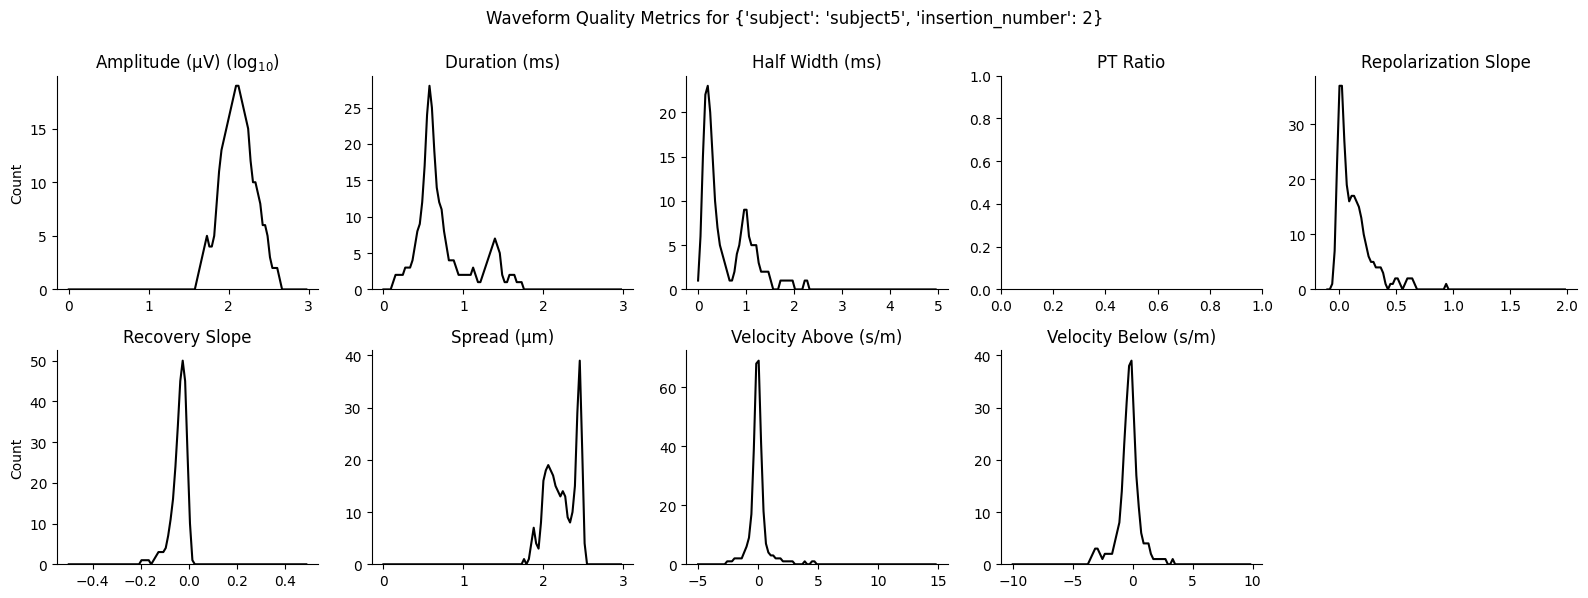

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
axes = axes.flatten()
plt.suptitle(f"Waveform Quality Metrics for {key}", y=.99, fontsize=12)

# Amplitude
data = np.log10(query.fetch("amplitude"))
bins = np.linspace(0, 3, 100)
plot_metric(axes[0], data, bins, title="Amplitude (μV) (log$_{10}$)")
axes[0].set_ylabel("Count")

# Duration
data = query.fetch("duration")
bins = np.linspace(0, 3, 100)
plot_metric(axes[1], data, bins, title="Duration (ms)")

# Half Width
data = query.fetch("halfwidth")
bins = np.linspace(0, 5, 100)
plot_metric(axes[2], data, bins, title="Half Width (ms)")

# Peak-to-Trough Ratio
data = query.fetch("pt_ratio")
bins = np.linspace(0, 1, 100)
plot_metric(axes[3], data, bins, title="Peak-to-Trough Ratio")

# Repolarization Slope
data = query.fetch("repolarization_slope")
bins = np.linspace(-0.1, 2, 100)
plot_metric(axes[4], data, bins, title="Repolarization Slope")

# Recovery Slope
data = query.fetch("recovery_slope")
bins = np.linspace(-0.5, 0.5, 100)
plot_metric(axes[5], data, bins, title="Recovery Slope")
axes[5].set_ylabel("Count")

# Spread
data = np.log10(query.fetch("spread"))
bins = np.linspace(0, 3, 100)
plot_metric(axes[6], data, bins, title="Spread (μm) (log$_{10}$)")

# Velocity Above
data = query.fetch("velocity_above")
bins = np.linspace(-5, 15, 100)
plot_metric(axes[7], data, bins, title="Velocity Above (s/m)")

# Velocity Below
data = query.fetch("velocity_below")
bins = np.linspace(-10, 10, 100)
plot_metric(axes[8], data, bins, title="Velocity Below (s/m)")

axes[9].remove()
plt.tight_layout()